In [1]:
#pynwb imports 

from pynwb import NWBFile, NWBHDF5IO, ProcessingModule
from pynwb.ecephys import Clustering, ClusterWaveforms, ElectricalSeries
from pynwb.misc import Units

# General Imports

import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import tz
from datetime import datetime
import io

%matplotlib inline

In [2]:
# Common Data Path
datapath = r'E:\20200703_C9_BC_g0'

#NI-DAQ raw files
nidq_bin = os.path.join(datapath, '20200703_C9_BC_g0_t0.nidq.bin')
nidq_meta = os.path.join(datapath, '20200703_C9_BC_g0_t0.nidq.meta')

#NI-DAQ CatGT/TPrime Output
xda = np.memmap((os.path.join(datapath, '20200703_C9_BC_g0_tcat.nidq.XA_0_500.txt')))
xd02 = np.memmap((os.path.join(datapath, '20200703_C9_BC_g0_tcat.nidq.XD_0_2_0.txt')))
xd03 = np.memmap((os.path.join(datapath, '20200703_C9_BC_g0_tcat.nidq.XD_0_3_0.txt')))
xd04 = np.memmap((os.path.join(datapath, '20200703_C9_BC_g0_tcat.nidq.XD_0_4_0.txt')))
xd05 = np.memmap((os.path.join(datapath, '20200703_C9_BC_g0_tcat.nidq.XD_0_5_0.txt')))
xd06 = np.memmap((os.path.join(datapath, '20200703_C9_BC_g0_tcat.nidq.XD_0_6_0.txt')))
xd07 = np.memmap((os.path.join(datapath, '20200703_C9_BC_g0_tcat.nidq.XD_0_7_0.txt')))
xd08 = np.memmap((os.path.join(datapath, '20200703_C9_BC_g0_tcat.nidq.XD_0_8_0.txt')))

In [10]:
# Path to imec0 Files
imec0_datapath = r"E:\20200703_C9_BC_g0\20200703_C9_BC_g0_imec0" 

# phy .npy outputs for imec0:
imec0_amplitudes = np.load(os.path.join(imec0_datapath, 'amplitudes.npy'))
imec0_channel_pos = np.load(os.path.join(imec0_datapath, 'channel_positions.npy'))
imec0_channel_map = np.load(os.path.join(imec0_datapath, 'channel_map.npy'))
imec0_spike_clusters = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_clusters.npy')))
imec0_spike_times = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_times.npy')))

# TPrime Outputs
imec0_spike_times2 = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_times_tprime2.npy')))
imec0_spike_times3 = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_times_tprime3.npy')))
imec0_spike_times4 = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_times_tprime4.npy')))
#imec0_spike_times5 = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_times_tprime5.npy')))
imec0_spike_times6 = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_times_tprime6.npy')))
imec0_spike_times7 = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_times_tprime7.npy')))
imec0_spike_times8 = np.ndarray.flatten(np.load(os.path.join(imec0_datapath, 'spike_times_tprime8.npy')))

# non-standard .npy containing mean waveforms for each cluster:
# mean_waveforms = np.load(os.path.join(datapath, 'mean_waveforms.npy'))

# .tsv containing cluster labels:
imec0_cluster_groups = pd.read_csv(os.path.join(imec0_datapath, 'cluster_group.tsv'), '\t')

In [4]:
# Path to imec1 Files
imec1_datapath = r"E:\20200703_C9_BC_g0\20200703_C9_BC_g0_imec1"

# phy .npy outputs for imec1:
imec1_amplitudes = np.load(os.path.join(imec1_datapath, 'amplitudes.npy'))
imec1_channel_pos = np.load(os.path.join(imec1_datapath, 'channel_positions.npy'))
imec1_channel_map = np.load(os.path.join(imec1_datapath, 'channel_map.npy'))
imec1_spike_clusters = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_clusters.npy')))
imec1_spike_times = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_times_tprime.npy')))

# TPrime Outputs
imec1_spike_times2 = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_times_tprime2.npy')))
imec1_spike_times3 = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_times_tprime3.npy')))
imec1_spike_times4 = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_times_tprime4.npy')))
#imec1_spike_times5 = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_times_tprime5.npy')))
imec1_spike_times6 = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_times_tprime6.npy')))
imec1_spike_times7 = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_times_tprime7.npy')))
imec1_spike_times8 = np.ndarray.flatten(np.load(os.path.join(imec1_datapath, 'spike_times_tprime8.npy')))

# non-standard .npy containing mean waveforms for each cluster:
# mean_waveforms = np.load(os.path.join(datapath, 'mean_waveforms.npy'))

# .tsv containing cluster labels:
imec1_cluster_groups = pd.read_csv(os.path.join(imec1_datapath, 'cluster_group.tsv'), '\t')

In [41]:
spikesecs2 = np.load(os.path.join(imec0_datapath, 'spikesecs2.npy'))


,0
0,0.005321
1,0.006254
2,0.006521
3,0.006721
4,0.007188


In [5]:
# Specify sampling rate in Hz

# If the data came from Open Ephys, the sampling rate is available in the 'structure.oebin' json file
# for example:
#    import json
#    info = json.load(open(fname))
#    sampling_rate = float(info['continuous'][0]['sample_rate'])

# Kilosort output file, 'params.py' contains the sampling rate. 
# This should be consistent across recordings, but you can always check
sampling_rate = 30000

In [36]:
channeldepth

TypeError: 'tuple' object is not callable

ValueError: x and y must have same first dimension, but have shapes (5000,) and (383, 2)

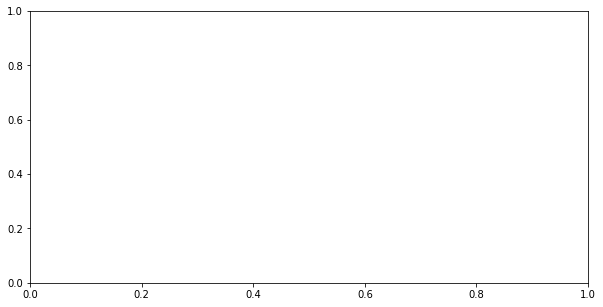

In [32]:
# imec0 - Raster for XD0,1
plt.figure(figsize=(10,5))

plt.plot(spikes_tprime[:5000],
         imec0_channel_pos[:5000],
         '.', color='gray')

plt.xlabel('Time (s)')
plt.ylabel('Depth')
plt.title('Spike Raster for All Units')
plt.show()

In [ ]:
# imec0 - Single unit amplitude plot
plt.figure(figsize=(10,2))

unitID = 34 # Select a Unit

plt.plot(imec0_spike_times[imec0_spike_clusters == unitID]/sampling_rate,
         imec0_amplitudes[imec0_spike_clusters == unitID],
         '.', color='orange',
         markersize=1,
         alpha=0.5)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Spike Amplitudes for One Unit')

plt.show()

In [ ]:
# imec1 - Raster for all units
plt.figure(figsize=(10,5))

plt.plot(imec0_spike_times3[:5000]/sampling_rate,
         imec0_spike_clusters[:5000],
         '.', color='gray')

plt.xlabel('Time (s)')
plt.ylabel('Unit ID')
plt.title('Spike Raster for All Units')
plt.show()

# imec1 - Single unit amplitude plot
plt.figure(figsize=(10,2))

unitID = 34 # Select a Unit

plt.plot(imec1_spike_times[imec1_spike_clusters == unitID]/sampling_rate,
         imec1_amplitudes[imec1_spike_clusters == unitID],
         '.', color='orange',
         markersize=1,
         alpha=0.5)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Spike Amplitudes for One Unit')

plt.show()

In [34]:
imec0_channelpos = pd.DataFrame(imec0_channel_pos)
imec0_channelpos.shape()

TypeError: 'tuple' object is not callable